In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


******  Housing Data Preprocessing ******

Load Data
كان في 207 داتا مفقودة في عمود عدد غرف النوم و كملتها ب المتوسيط

In [2]:
housing = pd.read_csv(r"..\data\data_1\housing.csv")

print(housing.head())
print(housing.info())
print(housing.isna().sum())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  
0         322         126         8.3252              452600  
1        2401        1138         8.3014              358500  
2         496         177         7.2574              352100  
3         558         219         5.6431              341300  
4         565         259         3.8462              342200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

In [3]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
print(housing.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


بس مشلتش القيم البعيدة لانها طبيعية و منطقية مش قيم سالبة او غريبة  median_income عملت بوكس بلوت لعمود 


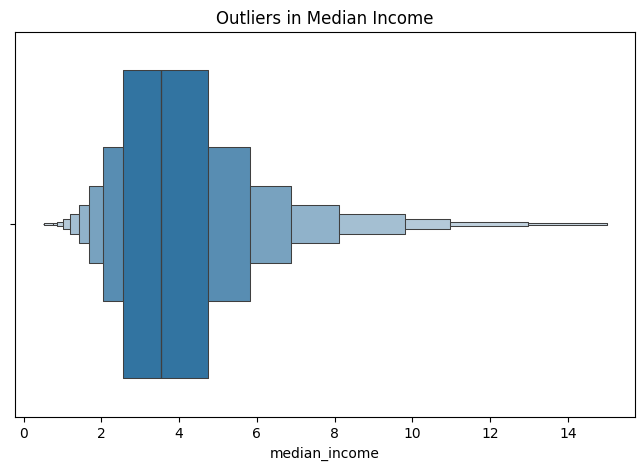

In [4]:
plt.figure(figsize=(8,5))
sns.boxenplot(x=housing['median_income'])
plt.title('Outliers in Median Income')
plt.show()

لداتا التدريب و الاختبار  scale   عملت  

Cluster للداتا كلها عشان هيستخدمها في ال  scale   عمر عمل  

Variables Names to use :

xhousing = All data except median house value column

yhousing = median house value (Target)

xhousing_train_scaled = Scaled Training data

Xhousing_test_scaled = Scaled test data

In [5]:
xhousing = housing.drop('median_house_value', axis=1)
yhousing = housing['median_house_value']

xhousing_train, xhousing_test, yhousing_train, yhousing_test = train_test_split(xhousing, yhousing, test_size=0.2,random_state=42)

scaler = StandardScaler()
xhousing_train_scaled = scaler.fit_transform(xhousing_train)
Xhousing_test_scaled = scaler.transform(xhousing_test)

xhousing_scaled_cluster = scaler.fit_transform(xhousing)
xhousing_scaled_cluster = pd.DataFrame(xhousing_scaled_cluster, columns=xhousing.columns)


print(f"X_train_scaled shape: {xhousing_train_scaled.shape}")
print(f"y_train shape: {yhousing_train.shape}")
print(f"y_train shape: {xhousing_scaled_cluster.shape}")

X_train_scaled shape: (16512, 8)
y_train shape: (16512,)
y_train shape: (20640, 8)


******  Heart Disease Data Preprocessing  ******

مكنش في داتا ناقصة لاكن كان في عواميد الداتا تايب بتاعها اوبجيكت بدل ارقام لان كان في قيم في الرمز
 "؟" 
استبدلت كل الداتا الي فيها علامة استفهام ب 
 Nan = قيم غير معرفة

 من كل عمود  Median بعدا مليت القيم الغير معرفة ب ال



In [6]:
heart = pd.read_csv(r"..\data\data _2\raw_merged_heart_dataset.csv")

print(heart.head())
print(heart.info())
print(heart.isna().sum())
print(heart['target'])

print(heart['trestbps'].unique())

   age  sex  cp trestbps chol fbs restecg thalachh exang  oldpeak slope ca  \
0   63    1   3      145  233   1       0      150     0      2.3     0  0   
1   37    1   2      130  250   0       1      187     0      3.5     0  0   
2   41    0   1      130  204   0       0      172     0      1.4     2  0   
3   56    1   1      120  236   0       1      178     0      0.8     2  0   
4   57    0   0      120  354   0       1      163     1      0.6     2  0   

  thal  target  
0    1       1  
1    2       1  
2    2       1  
3    2       1  
4    2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   reste

In [7]:
columns_to_fix = [
    'trestbps', 'chol', 'fbs', 'restecg', 
    'thalachh', 'exang', 'slope', 'ca', 'thal'
]

for col in columns_to_fix:
    heart[col] = pd.to_numeric(heart[col], errors='coerce')
    
    heart[col] = heart[col].fillna(heart[col].median())

print("--- بعد تنظيف كل الأعمدة ---")
print(heart.info())

--- بعد تنظيف كل الأعمدة ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   float64
 4   chol      2181 non-null   float64
 5   fbs       2181 non-null   float64
 6   restecg   2181 non-null   float64
 7   thalachh  2181 non-null   float64
 8   exang     2181 non-null   float64
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   float64
 11  ca        2181 non-null   float64
 12  thal      2181 non-null   float64
 13  target    2181 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 238.7 KB
None


Variables Names to use :

xheart = All data except target column

yheart = target

xheart_train_scaled = Scaled Training data

Xheart_test_scaled = Scaled test data

In [8]:
xheart = heart.drop('target',axis=1)

yheart = heart['target']

xheart_train,  xheart_test, yheart_train, yheart_test = train_test_split(xheart, yheart, test_size=0.2,random_state=42)

xheart_train_scaled = scaler.fit_transform(xheart_train)
Xheart_test_scaled = scaler.transform(xheart_test)
print(f"X_train_scaled shape: {xheart_train_scaled.shape}")
print(f"y_train shape: {yheart_train.shape}")

X_train_scaled shape: (1744, 13)
y_train shape: (1744,)


Clustring Model

2.Choose best k

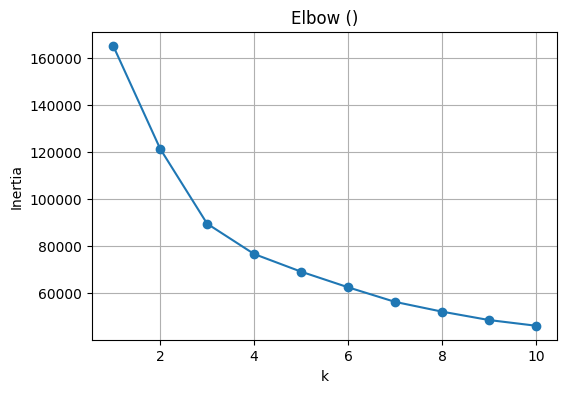

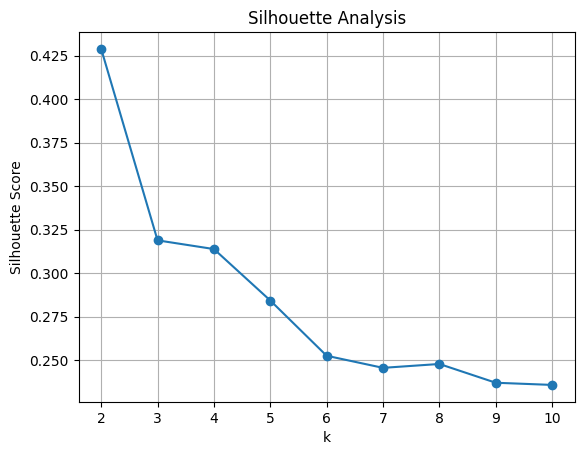

In [9]:
inertias = []
sil_scores = []
ks = range(1,11)
for k in ks:
    km = KMeans(n_clusters=k,random_state=42,n_init=10)
    labels = km.fit_predict(xhousing_scaled_cluster)
    inertias.append(km.inertia_)
    if k>1:
        sil_scores.append(silhouette_score(xhousing_scaled_cluster, labels))

#visuals the Elbow Method 
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel("k"); plt.ylabel("Inertia")
plt.title("Elbow ()")
plt.grid(True)
plt.show()
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.grid(True)
plt.show()

3.Train K-Means with k=3

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(xhousing_scaled_cluster)
xhousing_scaled_cluster["Cluster"] = clusters

score = silhouette_score(xhousing_scaled_cluster.drop("Cluster",axis=1), clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.31890967277846843


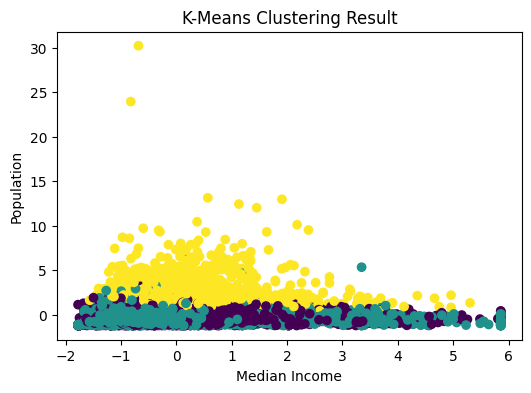

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(
    xhousing_scaled_cluster["median_income"],
    xhousing_scaled_cluster["population"],
    c=xhousing_scaled_cluster["Cluster"]
)
plt.xlabel("Median Income")
plt.ylabel("Population")
plt.title("K-Means Clustering Result")
plt.show()

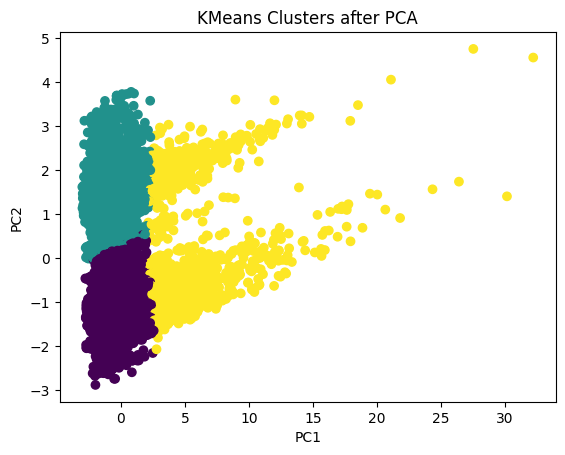

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(xhousing_scaled_cluster.drop("Cluster", axis=1))

plt.scatter(X_pca[:,0], X_pca[:,1],
            c=xhousing_scaled_cluster["Cluster"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters after PCA")
plt.show()